# Event Synchronization

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import time
import scipy.sparse

### Configurations

In [119]:
taumax2_subseas = 0
taumax8_subseas = 0
taumax16_subseas = 1

In [120]:
perc95 = 1
perc99 = 0
surr100 = 0
surr1000 = 1

In [121]:
if surr100:
    surr = '100'
elif surr1000:
    surr = '1000'

In [122]:
if perc95:
    perc = '95.0'
elif perc99:
    perc = '99.5'

In [123]:
file_path = '../data/'
file_grid_cells = 'grid_cell.txt'

if taumax2_subseas:
    file_path2 = file_path+'ES_taumax2_spatially_reduced/'
    
    #files to read
    file_name_sign_es = perc+'_'+'sign_es_subseas.taumax2.4dx4dy.ndjfm.spatiallyReduced.txt.npz'
    file_name_num_of_events = perc+'_'+'0num_of_events_subseas.taumax2.4dx4dy.ndjfm.spatiallyReduced.txt'
    file_name_thresh_val = perc+'_'+'0thresh_subseas.taumax2.4dx4dy.ndjfm.spatiallyReduced.txt'
    
    title1 = 'significant_es_lowSLP_extreme_field_to_spitsbergen_'+perc+'_'+surr+'_taumax2_subseas.spatiallyReduced'
    title2 = 'significant_es_lowSLP_extreme_field_from_spitsbergen_'+perc+'_'+surr+'_taumax2_subseas.spatiallyReduced'
    
elif taumax8_subseas:
    file_path2 = file_path+'ES_taumax8_spatially_reduced/'
    
    #files to read
    file_name_sign_es = perc+'_'+'sign_es_subseas.taumax8.4dx4dy.ndjfm.spatiallyReduced.txt.npz'
    file_name_num_of_events = perc+'_'+'0num_of_events_subseas.taumax8.4dx4dy.ndjfm.spatiallyReduced.txt'
    file_name_thresh_val = perc+'_'+'0thresh_subseas.taumax8.4dx4dy.ndjfm.spatiallyReduced.txt'
    
    title1 = 'significant_es_lowSLP_extreme_field_to_spitsbergen_'+perc+'_'+surr+'_taumax8_subseas.spatiallyReduced'
    title2 = 'significant_es_lowSLP_extreme_field_from_spitsbergen_'+perc+'_'+surr+'_taumax8_subseas.spatiallyReduced'

elif taumax16_subseas:
    file_path2 = file_path+'ES_taumax16_spatially_reduced/'
    
    #files to read
    file_name_sign_es = perc+'_'+'sign_es_subseas.taumax16.4dx4dy.ndjfm.spatiallyReduced.txt.npz'
    file_name_num_of_events = perc+'_'+'0num_of_events_subseas.taumax16.4dx4dy.ndjfm.spatiallyReduced.txt'
    file_name_thresh_val = perc+'_'+'0thresh_subseas.taumax16.4dx4dy.ndjfm.spatiallyReduced.txt'

    title1 = 'significant_es_lowSLP_extreme_field_to_spitsbergen_'+perc+'_'+surr+'_taumax16_subseas.spatiallyReduced'
    title2 = 'significant_es_lowSLP_extreme_field_from_spitsbergen_'+perc+'_'+surr+'_taumax16_subseas.spatiallyReduced'

### Reading Data and creating the complex network

In [124]:
if perc95:
    start_time = time.time()
    sign_es_list = []
    for i in range(100):
        sign_es_list.append(scipy.sparse.load_npz(file_path2+str(i)+'_'+file_name_sign_es))
    end_time = time.time()
    print('total time taken this code segment: ', end_time - start_time, ' s')

elif perc99:
    start_time = time.time()
    sign_es_list = []
    for i in range(100):
        sign_es_list.append(scipy.sparse.load_npz(file_path2+str(i)+'_'+file_name_sign_es))
    end_time = time.time()
    print('total time taken this code segment: ', end_time - start_time, ' s')    

total time taken this code segment:  0.8050360679626465  s


In [125]:
start_time = time.time()
full_sign_es_csr = sum(sign_es_list)
end_time = time.time()
print('total time taken this code segment: ', (end_time - start_time)/60, ' min')

total time taken this code segment:  0.0868548591931661  min


In [126]:
full_sign_es_csr

<16197x16197 sparse matrix of type '<class 'numpy.float32'>'
	with 28552888 stored elements in Compressed Sparse Row format>

In [127]:
sign_es = full_sign_es_csr.toarray().astype(np.int32)

In [128]:
sign_es.shape

(16197, 16197)

In [129]:
# complex network is created
sign_es

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

### Identifying lon lat coordinates of Complex Network

In [130]:
lat_list = []
lon_list = []
counter = 0
with open(file_path+file_grid_cells, "r") as file:
    for line in file:
        # file_grid_cells specific tasks
        if counter > 2 and counter < 83:
            lon_list.append(np.array(line.split(' ')[:-1], dtype=np.float64))
        if counter > 84:
            lat_list.append(np.array(line.split(' ')[:-1], dtype=np.float64))
            
        counter+=1

In [131]:
lat = np.concatenate(lat_list, axis=0)
lon = np.concatenate(lon_list, axis=0)

In [132]:
print(lat.shape, lon.shape)

(16197,) (16197,)


In [133]:
lon_lat_list = []
for i in range(lat.shape[0]):
    lon_lat_list.append((lon[i], lat[i]))
lon_lat = np.array(lon_lat_list)

In [134]:
lon_lat

array([[-180.       ,    0.9836063],
       [-178.8715   ,    0.9836063],
       [-177.7429   ,    0.9836063],
       ...,
       [ 120.       ,   88.66436  ],
       [ 180.       ,   88.66436  ],
       [-180.       ,   89.78488  ]])

### Identifying node of Spitsbergen's coordinates (78.54792 , 14.28571)

In [135]:
counter = 0
for coords in lon_lat:
    if coords[0] == 14.28571 and coords[1] == 78.54792:
        print(counter)
    counter+=1

15874


In [136]:
# coords of Spitsbergen with node 15874 representing Spitsbergen
lon_lat[15874]

array([14.28571, 78.54792])

### Plotting Spitsbergen's synchronized regions based on extreme cyclone events

In [137]:
to_spitsbergen_connetction = lon_lat[sign_es[15874,:].astype(np.bool_)]
from_spitsbergen_connetction = lon_lat[sign_es[:,15874].astype(np.bool_)]

In [138]:
print(to_spitsbergen_connetction.shape, from_spitsbergen_connetction.shape)

(1149, 2) (841, 2)


# -------------------------------Plotting es maps by interpolating-------------------------------

In [139]:
file_lats_unreduced = file_path + 'lats.4dx4dy_ndjfm.txt'
file_lons_unreduced = file_path + 'lons.4dx4dy_ndjfm.txt'

lat_unreduced = np.loadtxt(file_lats_unreduced)
lon_unreduced = np.loadtxt(file_lons_unreduced)


import matplotlib.tri as tri

def interpolate_irregular_data(x, y, z, xi, yi):
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)
    return zi

In [140]:
nyalesund_interp = interpolate_irregular_data(lon, lat, sign_es[15874], lon_unreduced, lat_unreduced)

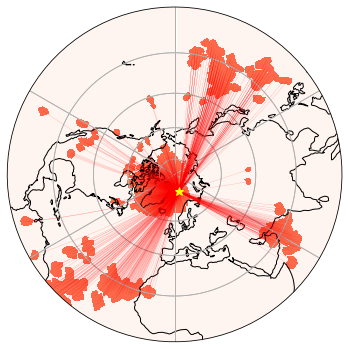

In [141]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('In- and Outdegree', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 2], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

clevs = [0,1]
es_map = ax.contourf(lon_unreduced, lat_unreduced, nyalesund_interp, levels=clevs, cmap=plt.cm.Reds, extend='both', transform=ccrs.PlateCarree())

#plot lines between snychronized coords
for coords in to_spitsbergen_connetction:
    plt.plot([14.28571, coords[0]], [78.54792, coords[1]], color='red', linewidth=0.1, transform=ccrs.Geodetic())

#plot spitsbergen
plt.plot(14.28571, 78.54792, color='yellow', marker='*', markersize=9, transform=ccrs.Geodetic())

plt.show()

# -------------------------------------------------------------------------------------------------------------------------------

### Teleconnection boxes

In [142]:
spitsbergen_box_vertices_lons = np.append(9, np.append(24.75, np.append(24.75, np.append(9, 9)))) #for plotting a square around spitsbergen
spitsbergen_box_vertices_lats = np.append(79.672035, np.append(79.672035, np.append(76.2997, np.append(76.2997, 79.672035))))

northwestrussia_box_vertics_lons = np.append(30, np.append(60, np.append(60, np.append(30, 30)))) #for plotting a square around north america
northwestrussia_box_vertics_lats = np.append(60, np.append(60, np.append(52, np.append(52, 60)))) 

northamerica_box_vertics_lons = np.append(-105, np.append(-90, np.append(-90, np.append(-105, -105)))) #for plotting a square around west russia
northamerica_box_vertics_lats = np.append(57, np.append(57, np.append(54, np.append(54, 57)))) 

kazakhstan_box_vertics_lons = np.append(68, np.append(82, np.append(82, np.append(68, 68)))) #for plotting a square around caribbean
kazakhstan_box_vertics_lats = np.append(46, np.append(46, np.append(44, np.append(44, 46)))) 

westafrica_box_vertices_lons = np.append(-30, np.append(-15, np.append(-15, np.append(-30, -30)))) #for plotting a square around westafrica/mauritania
westafrica_box_vertices_lats = np.append(25, np.append(25, np.append(15, np.append(15, 25))))

pacific_box_vertices_lons = np.append(150, np.append(160, np.append(160, np.append(150, 150)))) #for plotting a square around pacific
pacific_box_vertices_lats = np.append(30, np.append(30, np.append(25, np.append(25, 30))))

arabiansea_box_vertices_lons = np.append(56, np.append(64, np.append(64, np.append(56, 56)))) #for plotting a square around arabian aea
arabiansea_box_vertices_lats = np.append(25, np.append(25, np.append(18, np.append(18, 25))))

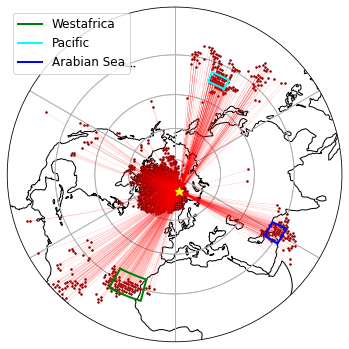

In [143]:
#show all significant connections to spitsbergen

#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj   
  
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Event synchronization of Ny-Alesund(t=0), marked by a yellow star, \n with the low slp-Extreme-Event field(-taumax<=t<0) (northern hemisphere)', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#plot synchronized coords
for coords in to_spitsbergen_connetction:
    plt.plot(coords[0], coords[1], color='darkred', marker='.', markersize=3, transform=ccrs.Geodetic())

#plot lines between snychronized coords
for coords in to_spitsbergen_connetction:
    plt.plot([14.28571, coords[0]], [78.54792, coords[1]], color='red', linewidth=0.1, transform=ccrs.Geodetic())

#plot spitsbergen
plt.plot(14.28571, 78.54792, color='yellow', marker='*', markersize=9, transform=ccrs.Geodetic())

plt.plot(westafrica_box_vertices_lons, westafrica_box_vertices_lats, color='green', linewidth=2, transform=ccrs.Geodetic(), label='Westafrica')
plt.plot(pacific_box_vertices_lons, pacific_box_vertices_lats, color='aqua', linewidth=2, transform=ccrs.Geodetic(), label='Pacific')
plt.plot(arabiansea_box_vertices_lons, arabiansea_box_vertices_lats, color='blue', linewidth=2, transform=ccrs.Geodetic(), label='Arabian Sea')

plt.legend(fontsize=12)
plt.show()
   
f.savefig(file_path+title1 + '.png', bbox_inches='tight', dpi=f.dpi)

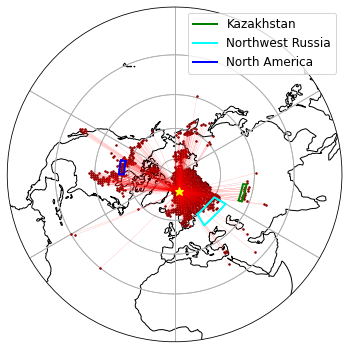

In [144]:
#show all significant connections from spitsbergen

#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj   
  
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Event synchronization of Ny-Alesund(t=0), marked by a yellow star, \n with the low slp-Extreme-Event field(-taumax<=t<0) (northern hemisphere)', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#plot synchronized coords
for coords in from_spitsbergen_connetction:
    plt.plot(coords[0], coords[1], color='darkred', marker='.', markersize=3, transform=ccrs.Geodetic())

#plot lines between snychronized coords
for coords in from_spitsbergen_connetction:
    plt.plot([14.28571, coords[0]], [78.54792, coords[1]], color='red', linewidth=0.1, transform=ccrs.Geodetic())

#plot spitsbergen
plt.plot(14.28571, 78.54792, color='yellow', marker='*', markersize=9, transform=ccrs.Geodetic())

plt.plot(kazakhstan_box_vertics_lons, kazakhstan_box_vertics_lats, color='green', linewidth=2, transform=ccrs.Geodetic(), label='Kazakhstan')
plt.plot(northwestrussia_box_vertics_lons, northwestrussia_box_vertics_lats, color='aqua', linewidth=2, transform=ccrs.Geodetic(), label='Northwest Russia')
plt.plot(northamerica_box_vertics_lons, northamerica_box_vertics_lats, color='blue', linewidth=2, transform=ccrs.Geodetic(), label='North America')

plt.legend(fontsize=12)
plt.show()
   
f.savefig(file_path+title2 + '.png', bbox_inches='tight', dpi=f.dpi)